# Домашнее задание 1

**Выполнил:** Теняев Александр Иванович

**На сколько выполнил:** 12 + - Epsilon
# WARNING

***Осторожно, не рекомендуется выполнятть код с конца, могут затереться некоторые переменные***

**Правила игры:**

* возле каждой задачи указано число баллов (в сококупности можно получить 10 баллов)

* дополнительные задачи выделены звездочкой (также указано число баллов). Данные баллы можно будет использовать для улучшения результата за любое домашнее задание

* все подсчеты необходимо делать с помощью pandas-numpy (использовать как можно меньше циклов, за использование циклов, где это не требуются, будем штрафовать)

* для визуализации можно использовать matplotlib-seaborn-plotly (учтите, что все графики должны выглядеть опрятно, иметь название-подписи, за нечитабельные графики будем штрафовать)

* возможно, что в данных есть пустоты и невалидные значения. Перед началом любой работы необходимо исследовать, и если такие есть, убрать их

* соблюдайте чистоту кода: переменные должны быть осмысленными, не повторяйтесь, если в этом нет необходимости (иначе используйте функции). Чем чище код - тем проще нам поставить вам хорошую оценку :)

* общая рекомендация: на вопросы со звездочкой отвечать в самом конце, возможно, будет проще)

## Данные 

В этом домашнем задании вам придется оказаться на месте аналитика в бразильском маркетплейсе [Olist](https://olist.com/pt-br/). Вам необходимо исследовать данные и на их основании сделать выводы, которые помогут бизнесу расцветать!

Данные находятся тут: (будет ссылка)

Ван дано 9 датасетов, которые содержат в себе все данные по 100 000 заказам со всей Бразилии. Чтобы облегчить вам жизнь, вот связи по этим датасетам (файл product_category_name_translation является переводом названий категорий с португальского на английский)

![](https://i.imgur.com/HRhd2Y0.png)

Ну что же, начнем, пожалуй!

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.parser import parse
import numpy as np
import pandas as pd
import datetime as dt
from dateutil.parser import parse
import dateutil
import pytz
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

In [ ]:
!wget https://github.com/Palladain/Deep_Python/raw/main/Homeworks/Homework_1/archive.zip

--2022-10-16 19:40:26--  https://github.com/Palladain/Deep_Python/raw/main/Homeworks/Homework_1/archive.zip
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Palladain/Deep_Python/main/Homeworks/Homework_1/archive.zip [following]
--2022-10-16 19:40:26--  https://raw.githubusercontent.com/Palladain/Deep_Python/main/Homeworks/Homework_1/archive.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44717580 (43M) [application/zip]
Saving to: ‘archive.zip.4’

archive.zip.4       100%[===================>]  42.65M   244MB/s    in 0.2s    

2022-10-16 19:40:26 (244 MB/s) - ‘archive.zip.4’ saved [44717

In [ ]:
!unzip archive.zip

Archive:  archive.zip
replace olist_customers_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
customers = pd.read_csv("olist_customers_dataset.csv")  ## клиенты
geolocation = pd.read_csv("olist_geolocation_dataset.csv")  ## геолокация
order_items = pd.read_csv("olist_order_items_dataset.csv")    ## детали заказа товара
order_payments = pd.read_csv("olist_order_payments_dataset.csv")  ## детали платежа
order_reviews = pd.read_csv("olist_order_reviews_dataset.csv")  ## информация об отзывах
orders = pd.read_csv("olist_orders_dataset.csv")  ## о доставке
products = pd.read_csv("olist_products_dataset.csv")  ## характеристики товара
sellers = pd.read_csv("olist_sellers_dataset.csv")  ## о продавцах
product_translation = pd.read_csv("product_category_name_translation.csv")  ## перевод названий на англиский

## Задание 1 (0.4 балла) ***Сдавать***

Определите:

* Число товаров
* Среднюю стоимость товара

в разрезе категорий (все категории должны быть на английском языке)

In [ ]:
# средняя стоимость товара по категориям на английском
df1 = pd.merge(order_items, products, on="product_id")
df2 = pd.merge(df1, product_translation, on="product_category_name")
df2.groupby("product_category_name_english").agg({"price": "mean"})


,price
product_category_name_english,
agro_industry_and_commerce,342.124858
air_conditioning,185.269226
art,115.802105
arts_and_craftmanship,75.583750
audio,139.254121
...,...
stationery,91.753369
tablets_printing_image,90.703735
telephony,71.213978


In [ ]:
# количестов товаров по категориям на английском
merged_products = pd.merge(products, product_translation, on = "product_category_name")
merged_products.groupby(["product_category_name_english"]).agg({"product_id": "nunique"})

,product_id
product_category_name_english,
agro_industry_and_commerce,74
air_conditioning,124
art,55
arts_and_craftmanship,19
audio,58
...,...
stationery,849
tablets_printing_image,9
telephony,1134


## Задание 2 (1,5 балла) ***Сдавать***

Определите для каждого продавца основную категорию их продаж.

Отобразите категории по числу продавцов, для которых данная категория основная, а также создайте график, по которому можно выбрать отдельно штат и посмотреть такое же распределение



In [ ]:
df = pd.merge(order_items, products, on = "product_id") ## чтобы был продакт категори нейм
df = pd.merge(df, product_translation, on="product_category_name")

# df.groupby("lambda x").agg({"product_category_name_english" : lambda x,  value_counts(x).index[0] })


# Определите для каждого продавца основную категорию их продаж

seller_name = []
seller_category = []

for seller in df["seller_id"].unique():

  j = df[df.seller_id == seller]
  seller_name.append(seller)
  m = (j["product_category_name_english"].value_counts())
  m = m.index.tolist()[0]
  seller_category.append(m)

data = {"Seller_name" : seller_name, "Seller_category" : seller_category}
data = pd.DataFrame(data)
data

,Seller_name,Seller_category
0,48436dade18ac8b2bce089ec2a041202,cool_stuff
1,8cbac7e12637ed9cffa18c7875207478,cool_stuff
2,3504c0cb71d7fa48d967e0e4c94d59d9,cool_stuff
3,e26901d5ab434ce92fd9b5c256820a4e,garden_tools
4,7a67c85e85bb2ce8582c35f2203ad736,cool_stuff
...,...,...
3028,01266d4c46afa519678d16a8b683d325,costruction_tools_tools
3029,3d2400ac620cffa23ac81bd192f7f555,costruction_tools_tools
3030,7178e1eaa97257d8b6d4b80efd77a025,costruction_tools_tools
3031,2a167ca73899c85001a837d8fb4962f6,costruction_tools_tools


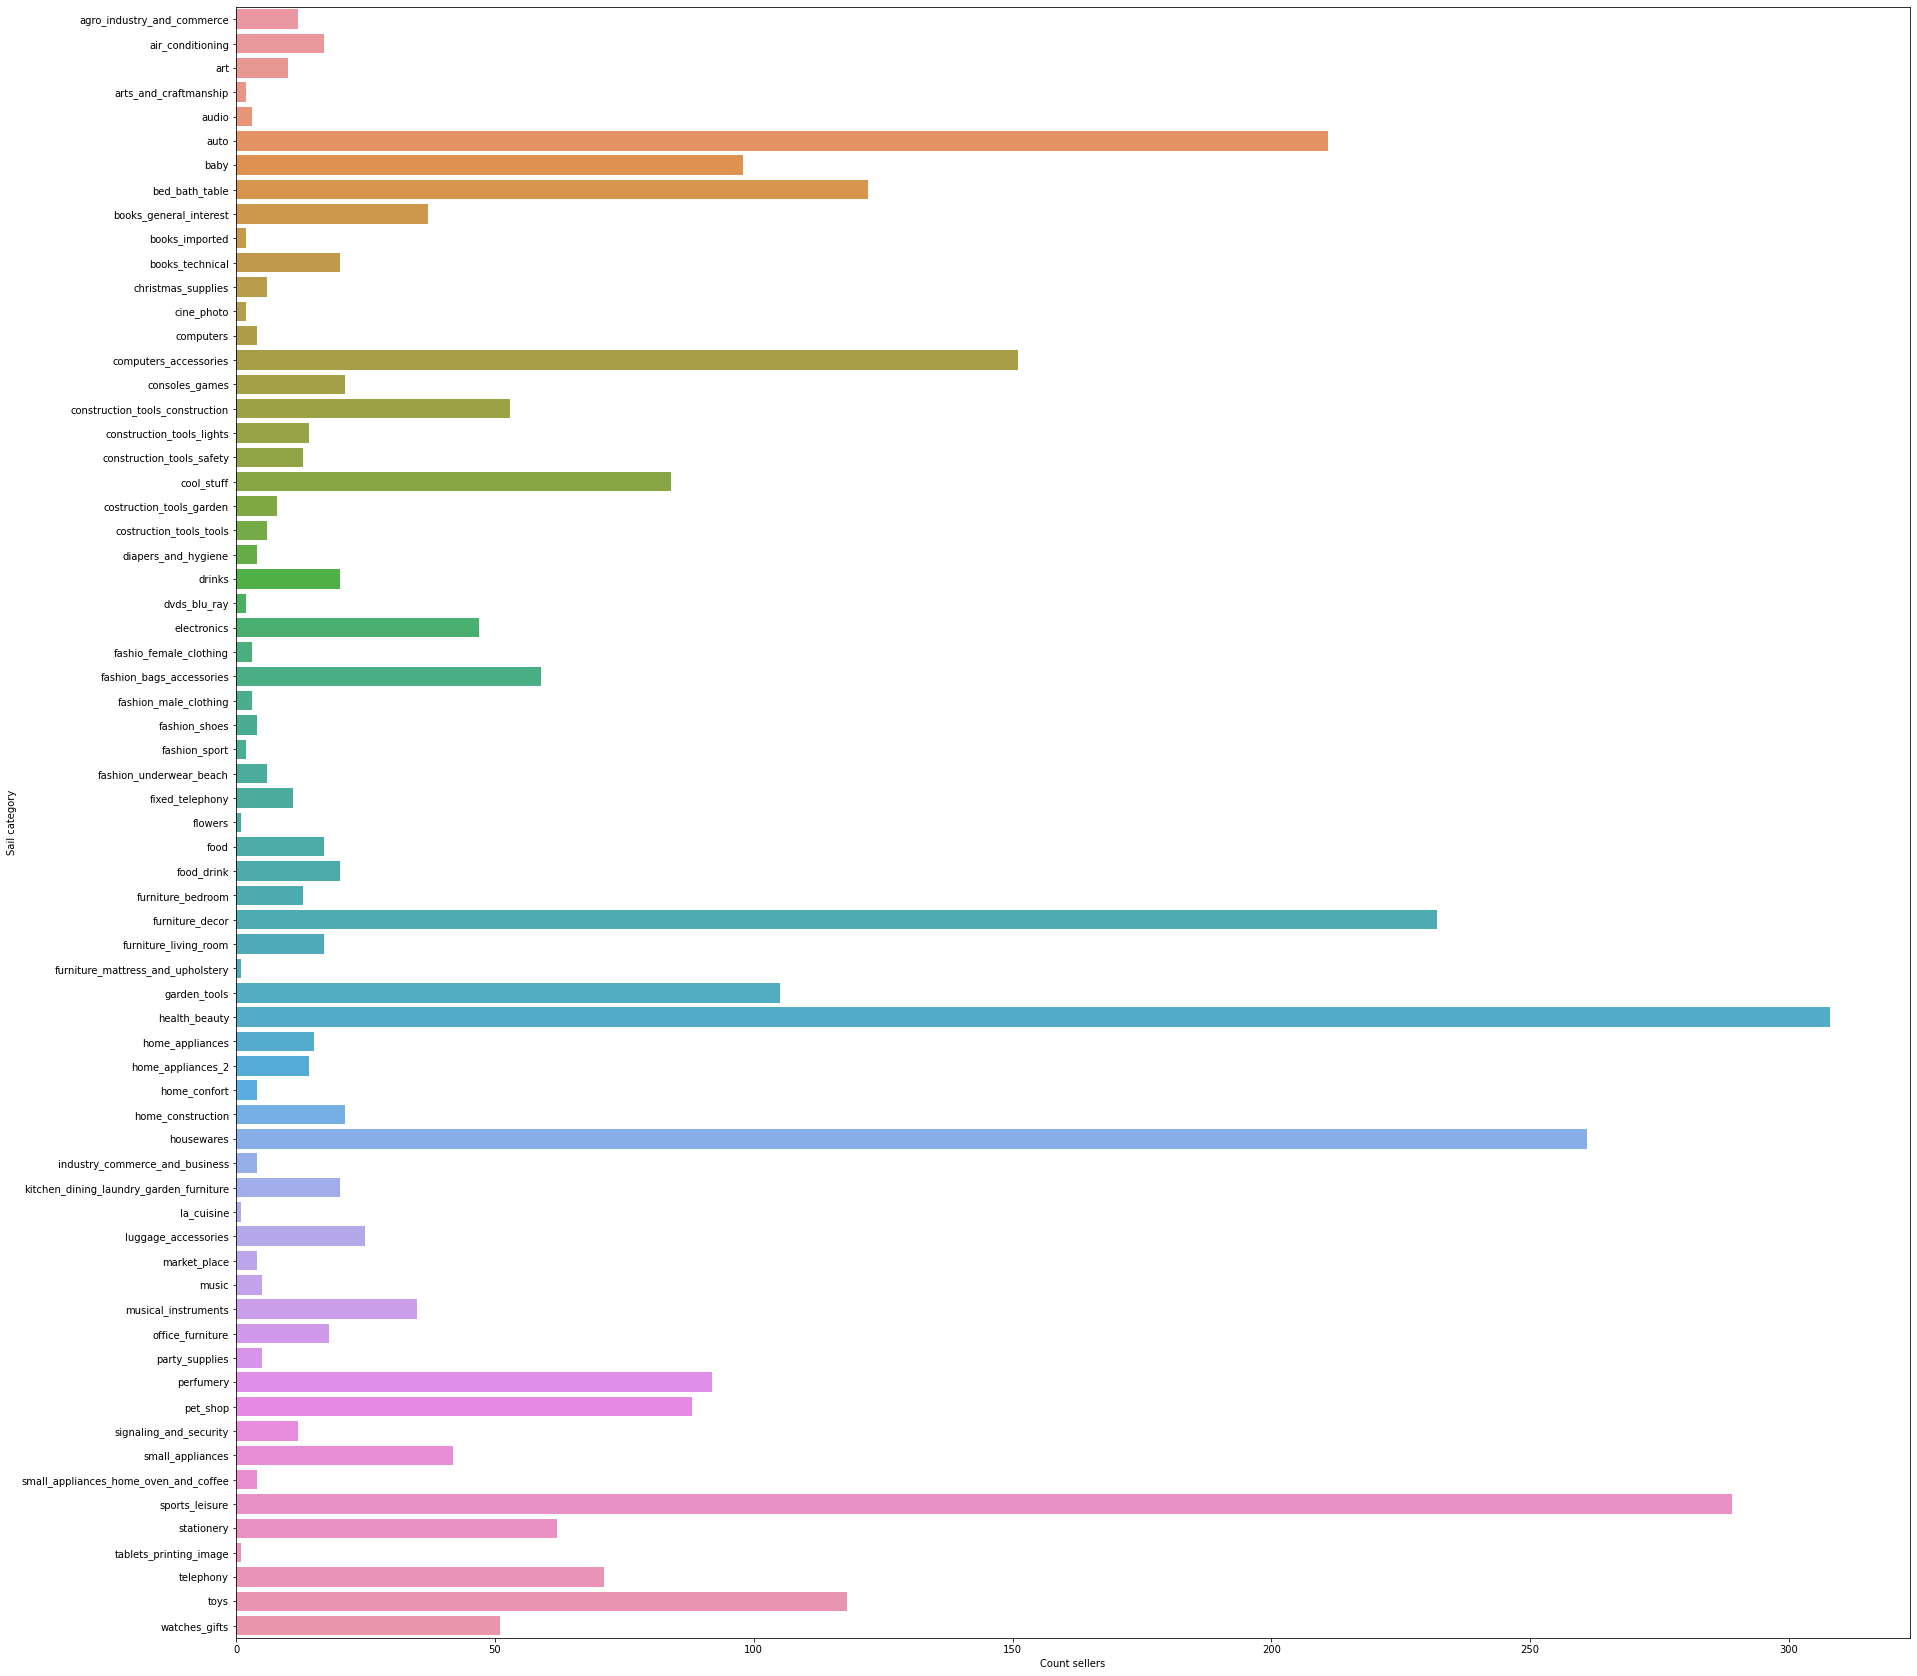

In [ ]:
# График, где для каждой категори показано количество продавцов, для которых данная категория основная

plt.figure(figsize=(30, 30))

sns.barplot(data = data.groupby("Seller_category")
            .agg({"Seller_name": "count"})
            .reset_index().rename(columns={"Seller_name":"Count sellers", "Seller_category": "Sail category"})
            , x="Count sellers"
            , y="Sail category")


plt.show()

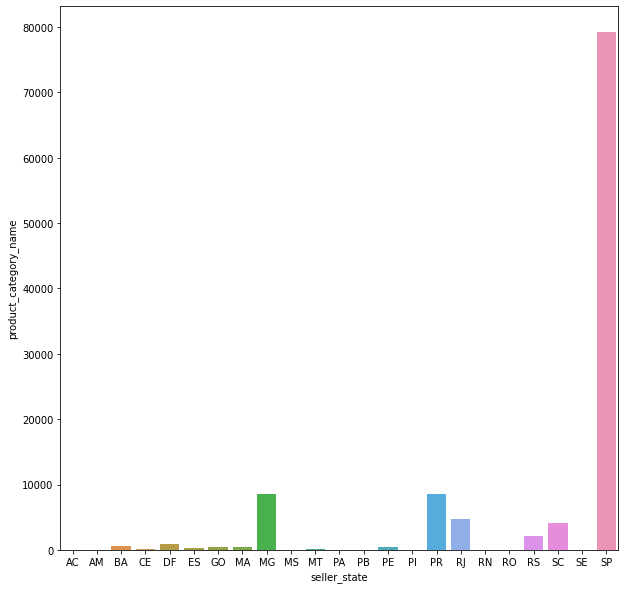

In [ ]:
# Количество продаж по штатам


df = pd.merge(order_items, products, on="product_id")
df = pd.merge(df, sellers, on="seller_id")


df.groupby("seller_state").agg({"product_category_name":"count"}).reset_index()

plt.figure(figsize=(10, 10))

sns.barplot(data = df.groupby("seller_state").agg({"product_category_name":"count"}).reset_index()
            , x="seller_state"
            , y="product_category_name")

plt.show()

## Задание 3 (1,5 балл) ***Сдавать***

Покажите процент

* суммы покупок в деньгах

* суммы покупок в штуках

по категории для доставленных заказов, а также разбивку по штатам

In [ ]:
# Подготовка данных

df = pd.merge(products, order_items, on="product_id")
df = pd.merge(df, orders, on="order_id")
df = pd.merge(df, product_translation, on="product_category_name")
df_delivered = df[df.order_status == "delivered"]

df_delivered.dropna()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,...,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,...,10.91,7.39,f8a3e963a310aa58b60a5b1fed5bceb5,delivered,2018-04-24 16:16:53,2018-04-24 19:04:19,2018-04-25 17:01:00,2018-04-27 16:42:17,2018-05-09 00:00:00,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,048cc42e03ca8d43c729adf6962cb348,...,16.90,7.78,12a2c614dfc8926e793516b1638c7471,delivered,2017-11-16 21:28:00,2017-11-17 21:35:39,2017-11-21 22:14:50,2017-11-23 15:39:38,2017-11-29 00:00:00,perfumery
2,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,5fa78e91b5cb84b6a8ccc42733f95742,...,16.90,7.78,c15eed3881abc9e06763c989679c5094,delivered,2017-11-30 01:51:23,2017-12-08 16:33:14,2017-12-09 00:53:08,2017-12-13 20:52:32,2017-12-18 00:00:00,perfumery
3,0d009643171aee696f4733340bc2fdd0,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,24b1c4d88fdb7a2dc87f8ecc7d8f47f1,...,339.00,17.13,6d699e3ab0fd90fffb3d1379d937de77,delivered,2017-07-28 09:34:29,2017-07-28 09:50:14,2017-07-28 21:42:11,2017-08-08 16:03:45,2017-08-21 00:00:00,perfumery
4,0d009643171aee696f4733340bc2fdd0,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,7b13c77c64a9a956500cbf1a9a23798d,...,275.00,23.48,45d942b1af5529f8990f27848a40e645,delivered,2018-05-17 09:24:18,2018-05-17 10:38:35,2018-06-01 09:04:00,2018-06-07 19:12:50,2018-06-05 00:00:00,perfumery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111018,1dceebcc5f23c02ea23e16d5bedca000,cds_dvds_musicais,47.0,117.0,2.0,550.0,35.0,15.0,25.0,7ed69fbc79fbda50e09caa9c127026e5,...,65.00,52.58,1ce59f480a5fbb7054f9f8e59c577858,delivered,2018-04-20 11:30:06,2018-04-20 11:54:43,2018-04-20 21:03:34,2018-05-09 23:38:24,2018-05-25 00:00:00,cds_dvds_musicals
111019,1dceebcc5f23c02ea23e16d5bedca000,cds_dvds_musicais,47.0,117.0,2.0,550.0,35.0,15.0,25.0,9c782cb7854e5dfa91927cfca8949eb8,...,45.00,16.11,9cedc9b5217be6c8cb89e73ce5390c1e,delivered,2017-07-10 11:26:19,2017-07-10 11:35:22,2017-07-12 20:40:54,2017-07-18 18:29:36,2017-08-08 00:00:00,cds_dvds_musicals
111020,1dceebcc5f23c02ea23e16d5bedca000,cds_dvds_musicais,47.0,117.0,2.0,550.0,35.0,15.0,25.0,cea54c1853c864ab36cea3ef732d7191,...,65.00,9.94,c09801227c7f48130b33a8ddb9d91660,delivered,2017-11-04 09:48:44,2017-11-05 11:50:17,2017-11-07 21:06:48,2017-11-14 21:37:04,2017-11-27 00:00:00,cds_dvds_musicals
111021,1dceebcc5f23c02ea23e16d5bedca000,cds_dvds_musicais,47.0,117.0,2.0,550.0,35.0,15.0,25.0,d4e8d3bb5e3673ed68ac154fe86de946,...,45.00,16.11,63155d2512ff588adce41f3fb43f6a6d,delivered,2017-10-24 11:15:05,2017-10-24 11:29:30,2017-10-26 20:52:47,2017-11-03 18:57:44,2017-11-29 00:00:00,cds_dvds_musicals


In [ ]:
# процент покупок в деньгах по категориям

delived_price = df_delivered.price.sum()
df_category_maney = df_delivered.groupby("product_category_name_english").agg({"price":"sum"}).reset_index()
df_category_maney["%"] = df_category_maney["price"] / delived_price * 100

df_category_maney.rename(columns={"price" : "sum price"})

,product_category_name_english,sum price,%
0,agro_industry_and_commerce,70566.10,0.540922
1,air_conditioning,53323.56,0.408750
2,art,23657.30,0.181344
3,arts_and_craftmanship,1814.01,0.013905
4,audio,50570.60,0.387647
...,...,...,...
66,stationery,223788.69,1.715443
67,tablets_printing_image,7528.41,0.057709
68,telephony,309860.23,2.375221
69,toys,471286.48,3.612628


In [ ]:
# процент покупок в штуках по категориям

delived_count = df_delivered.price.count()
df_category_items = df_delivered.groupby("product_category_name_english").agg({"price":"count"}).reset_index()
df_category_items["%"] = df_category_items["price"] / delived_count * 100

df_category_items.rename(columns = {"product_category_name_english":"Category name", "price" : "count items"})

,Category name,count items,%
0,agro_industry_and_commerce,206,0.189621
1,air_conditioning,289,0.266021
2,art,197,0.181336
3,arts_and_craftmanship,24,0.022092
4,audio,362,0.333217
...,...,...,...
66,stationery,2466,2.269924
67,tablets_printing_image,83,0.076401
68,telephony,4430,4.077763
69,toys,4030,3.709568


## Задание 4 (0.6 балла) ***Сдавать***

Визуализируйте зависимость между средним числом покупок и:

* числом фотографий товара

* кол-во символов в описании товара (аггрегируйте с шагом 20)

* кол-во символов в названии (аггрегируйте с шагом 5)

In [ ]:
df = pd.merge(products, order_items, on="product_id")

count_oreders = df.groupby("product_id").agg({"order_id":"count"}).reset_index()

photos = df[["product_id", "product_photos_qty"]].drop_duplicates("product_id")

description = df[["product_id", "product_description_lenght"]].drop_duplicates("product_id")
description["product_description_lenght"] /= 20

name = df[["product_id", "product_name_lenght"]].drop_duplicates("product_id")
name["product_name_lenght"] /= 5

count_oreders

,product_id,order_id
0,00066f42aeeb9f3007548bb9d3f33c38,1
1,00088930e925c41fd95ebfe695fd2655,1
2,0009406fd7479715e4bef61dd91f2462,1
3,000b8f95fcb9e0096488278317764d19,2
4,000d9be29b5207b54e86aa1b1ac54872,1
...,...,...
32946,fff6177642830a9a94a0f2cba5e476d1,2
32947,fff81cc3158d2725c0655ab9ba0f712c,1
32948,fff9553ac224cec9d15d49f5a263411f,1
32949,fffdb2d0ec8d6a61f0a0a0db3f25b441,5


Text(0, 0.5, 'Среднее число покупок')

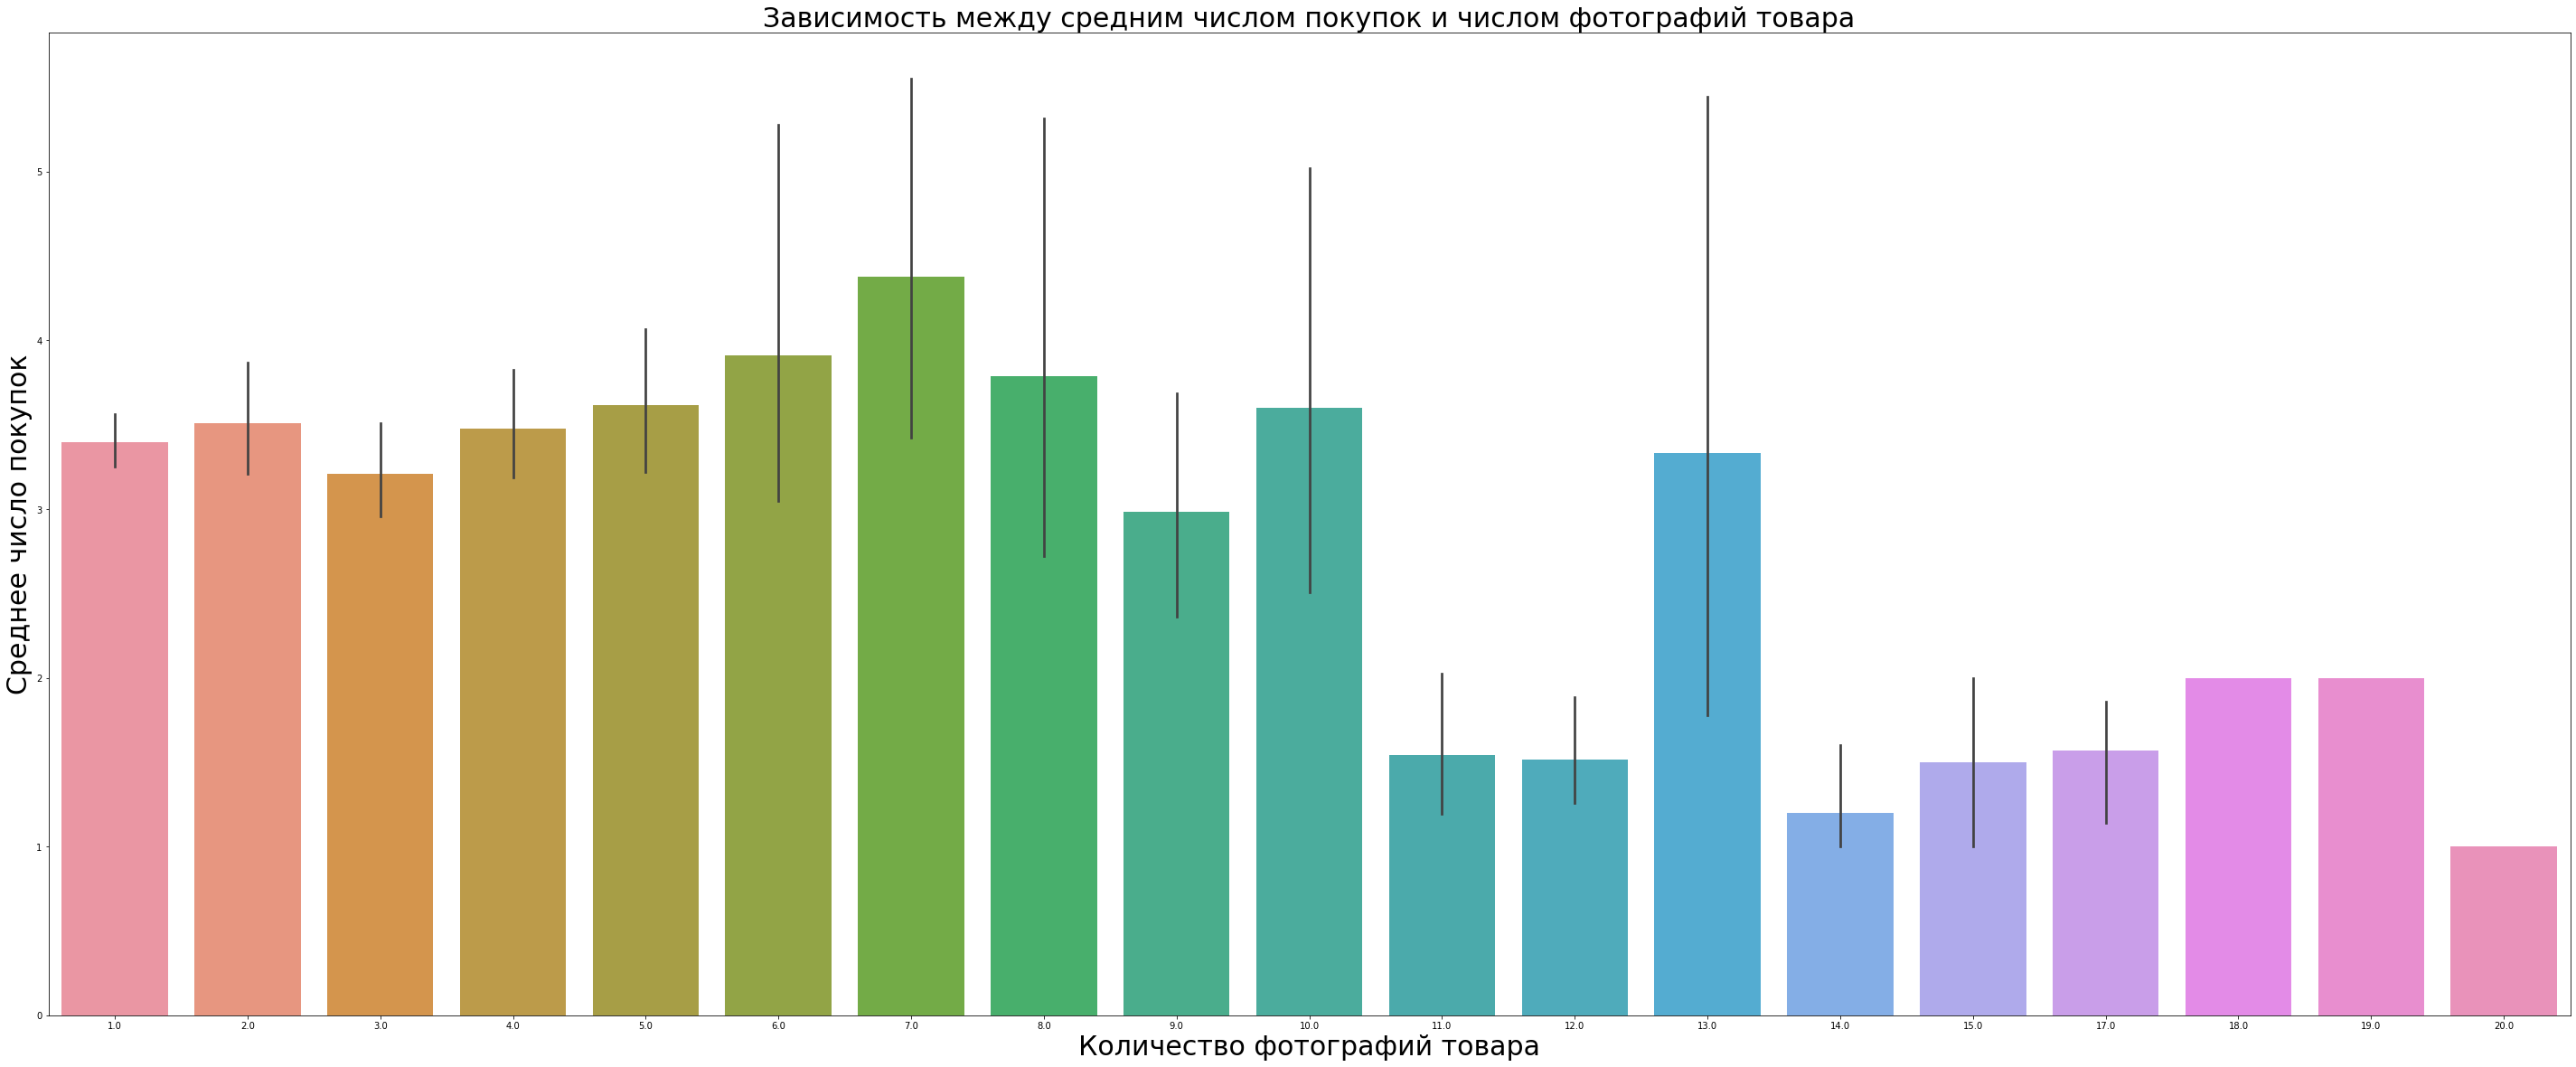

In [ ]:
df1 = pd.merge(count_oreders, photos)

plt.figure(figsize=(50, 20))
b1 = sns.barplot(data=df1 \
    , x="product_photos_qty", y="order_id")

b1.axes.set_title("Зависимость между средним числом покупок и числом фотографий товара", fontsize=30)
b1.set_xlabel("Количество фотографий товара", fontsize=30)
b1.set_ylabel("Среднее число покупок", fontsize=30)

Text(0, 0.5, 'Кол-во символов в описании товара')

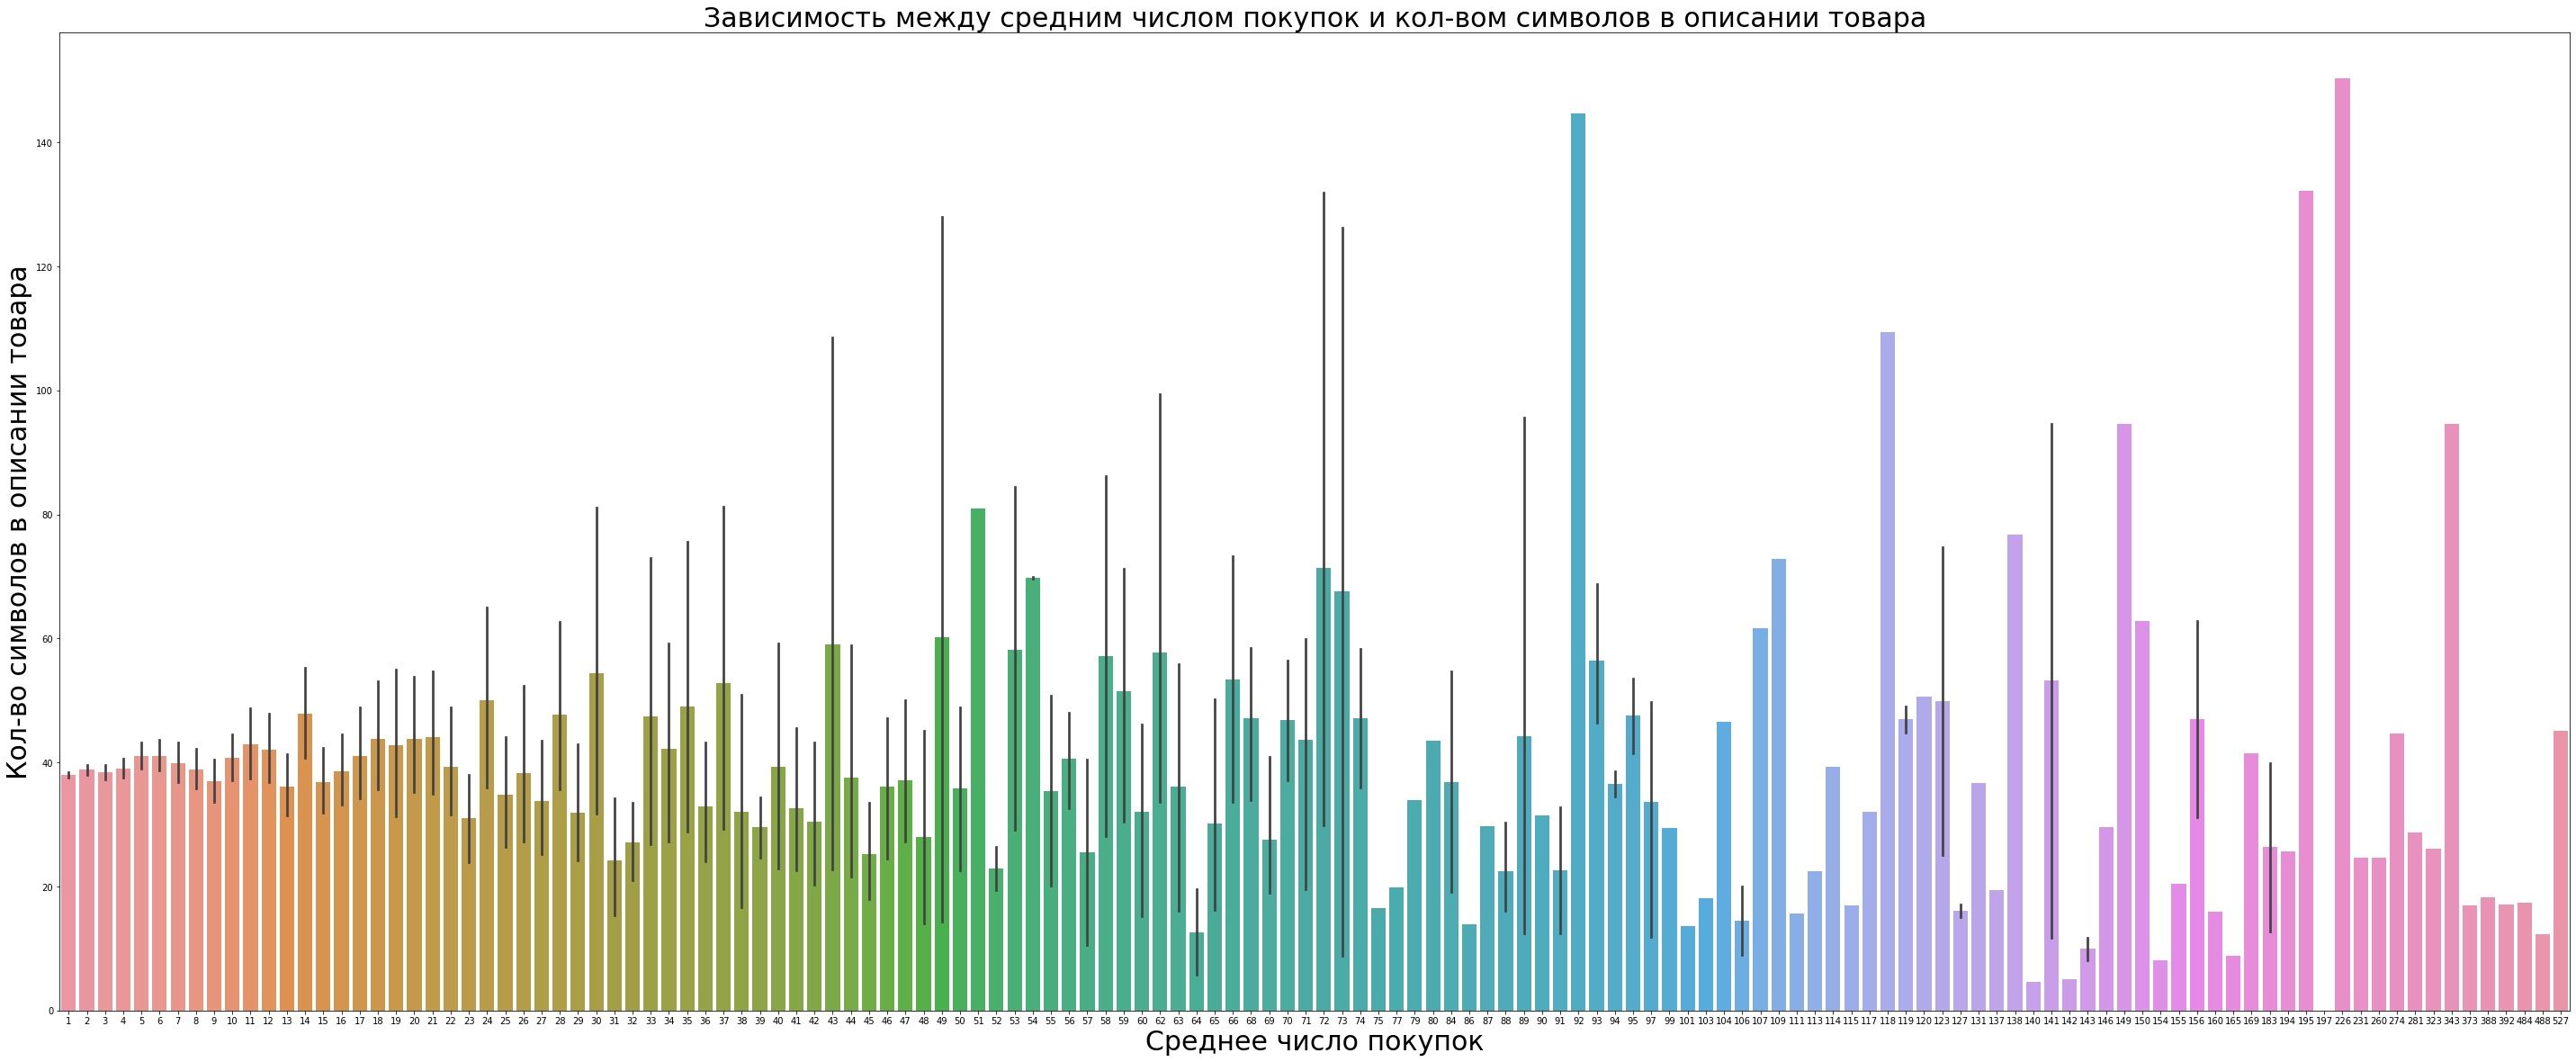

In [ ]:
df2 = pd.merge(count_oreders, description)


plt.figure(figsize=(50, 20))
b2 = sns.barplot(data=df2 \
    , x="order_id", y="product_description_lenght")

b2.axes.set_title("Зависимость между средним числом покупок и кол-вом символов в описании товара", fontsize=30)
b2.set_xlabel("Среднее число покупок", fontsize=30)
b2.set_ylabel("Кол-во символов в описании товара", fontsize=30)

Text(0, 0.5, 'Кол-во символов в названии товара')

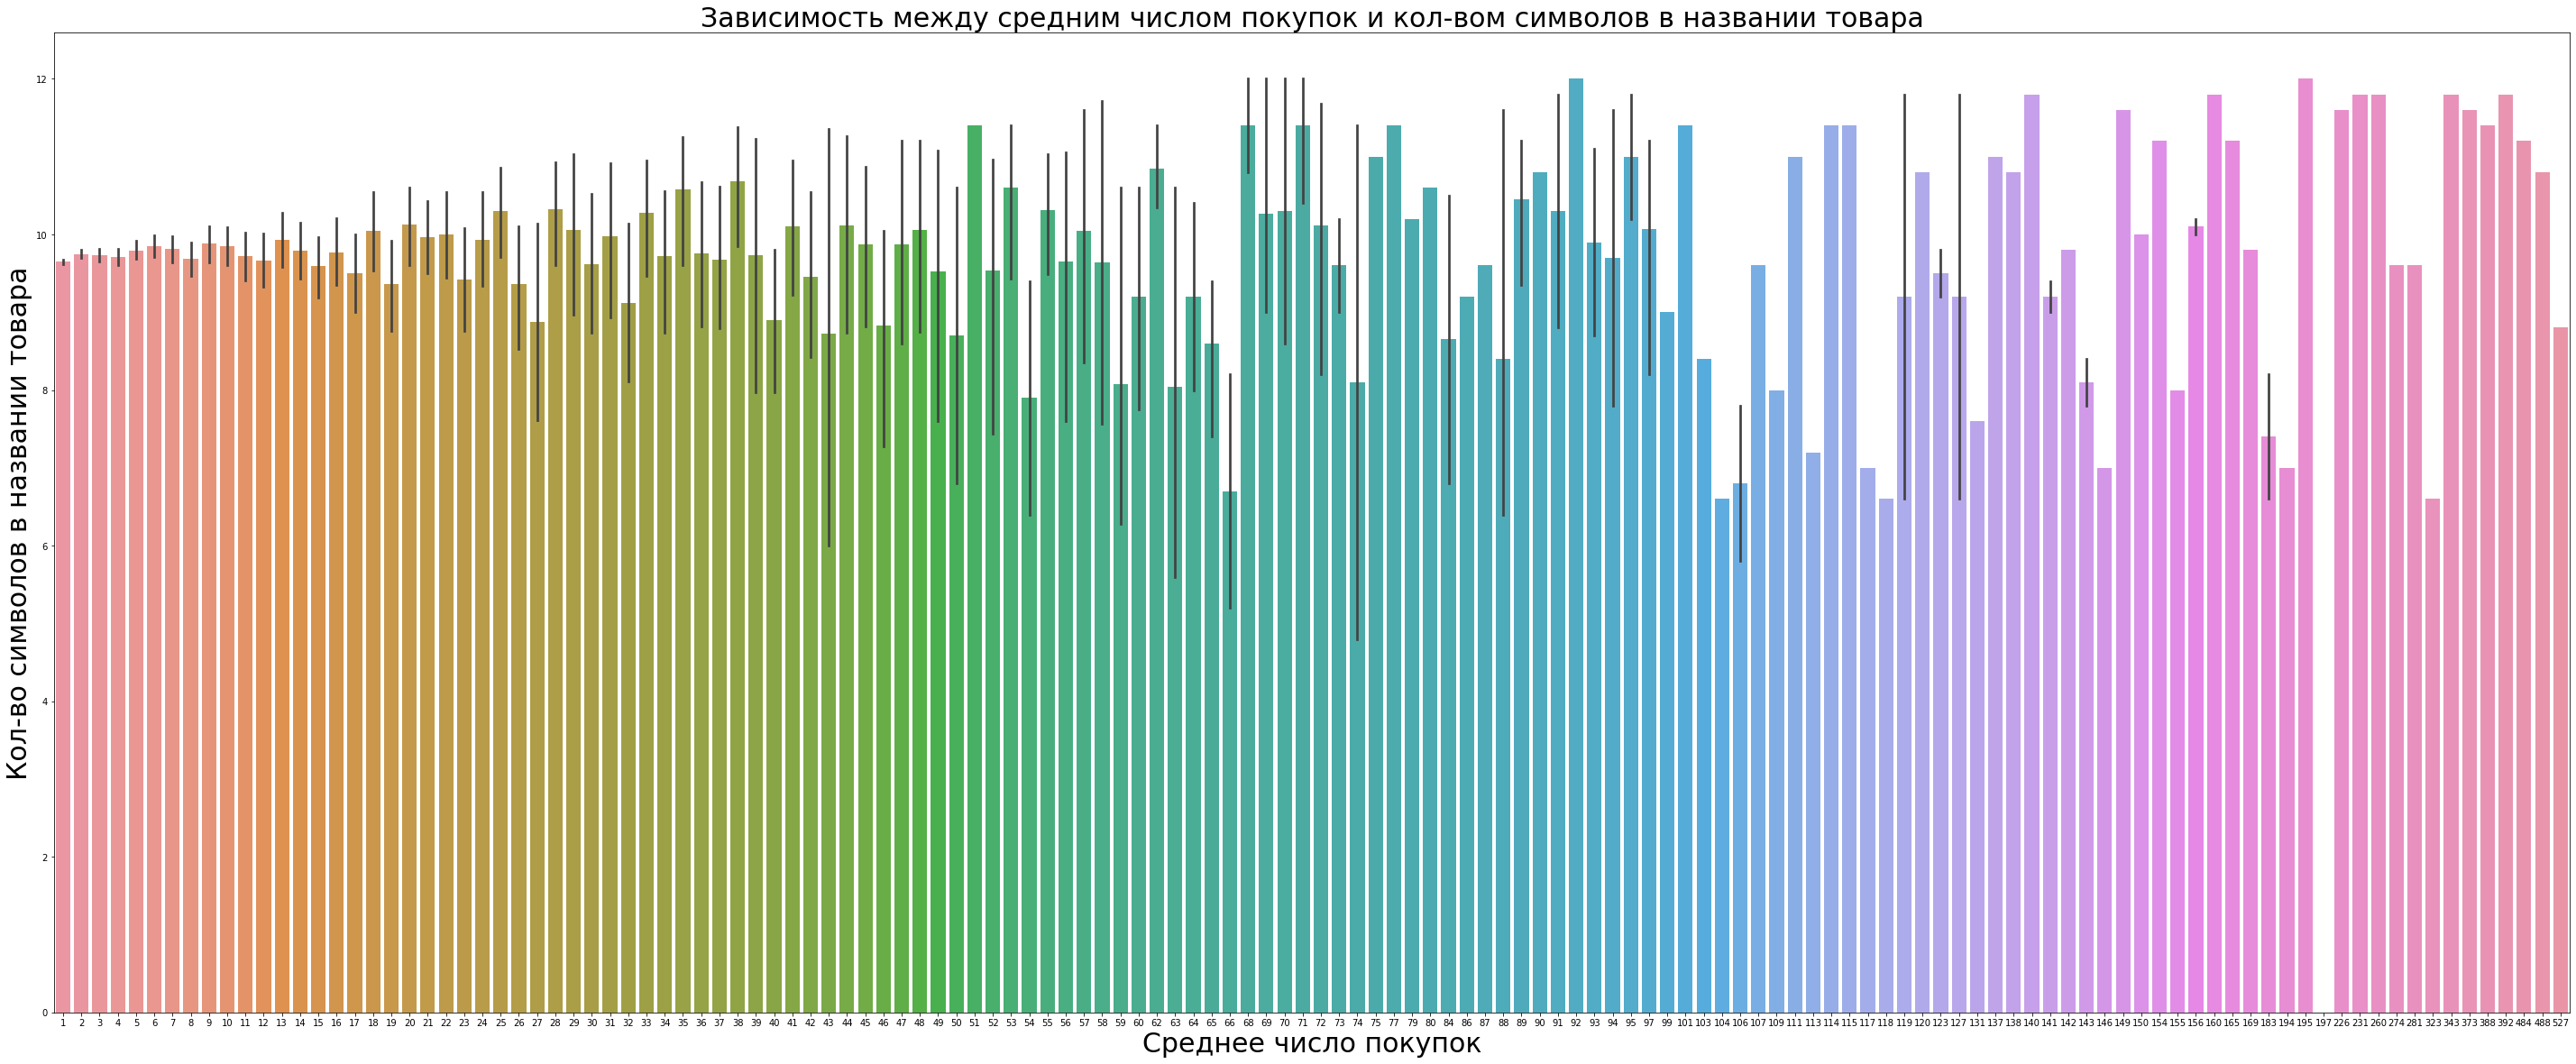

In [ ]:
df3 = pd.merge(count_oreders, name)

plt.figure(figsize=(50, 20))
b2 = sns.barplot(data=df3 \
    , x="order_id", y="product_name_lenght")

b2.axes.set_title("Зависимость между средним числом покупок и кол-вом символов в названии товара", fontsize=30)
b2.set_xlabel("Среднее число покупок", fontsize=30)
b2.set_ylabel("Кол-во символов в названии товара", fontsize=30)

## Задание 5* (1 балл)

Имея полученные данные по товарам, чекам и категориям, а также сделав дополнительные расчеты (если необходимо), предположите:

1. Продавцов каких категорий необходимо привлекать в маркетплейс?
***Например, категории garden tools, pet shop telephony и др***

2. Какие категории в каких штатах необходимо развивать?
**Например в штате SP популярностью пользуются категории toys и office furniture. У этих категорий есть потенциал для развития**

3. Развитие каких категорий не принесут большого эффекта и почему?
***Мне кажется, категории flowers и food. Продажа цветов скорее всего зависит от сезонности. Продукты обычно покупают в супермакете, a не на маркетплейсе.***

4. Какие рекомендации можно дать для продавцов, чтобы их товар лучше продавался?
***По одному из графков видно, что от количества фотографий не зависят продажи, можно попробовтаь сократить количество фотографий у товара, так же попробовать ориентировать продажи на штат MG, PR, SP. ***

## Задание 6 (0.5 балла) ***Сдавать***


Определите средний чек покупки (добавьте разбивку на стоимость самого заказ и стоимость доставки) и среднее число товаров в заказе

In [ ]:
# Средний чек покупки
# нужно ли умножить на один столбец нужно ли юник?
order_items["sum_price_freight_value"] = order_items["price"] + order_items["freight_value"]



count_orders = len(order_items.order_id.unique())

sum_prices = (order_items["price"] ).sum()

sum_freight_value = order_items["freight_value"].sum()

print("Средняя стоимость заказа = ", sum_prices / count_orders)
print("Средняя стоимость доставки = ", sum_freight_value / count_orders)
print("Средняя стоимость заказа и доставки = ", order_items["sum_price_freight_value"].sum() / count_orders)


Средняя стоимость заказа =  137.7540763788945
Средняя стоимость доставки =  22.82356171325482
Средняя стоимость заказа и доставки =  160.57763809214927


In [ ]:
# средне число товаров в заказе
count_orders = len(order_items.order_id.unique())
count_products = len(order_items.product_id)
mean_product_in_order = count_products / count_orders
print("Среднее число товаров в заказе", mean_product_in_order)


Среднее число товаров в заказе 1.1417306873695092


## Задание 7 (0.2 балла) ***Сдавать***

Определите среднее число покупок на пользователя (обратите внимание на идентификаторы)

In [ ]:
сount_costomers = len(customers.customer_unique_id.unique())

count_orders = len(orders.order_id.unique())

count_orders / сount_costomers

print("Среднее число покупок на пользователя", count_orders / сount_costomers)

Среднее число покупок на пользователя 1.0348089410589412


## Задание 8 (0.2 балла) ***Сдавать***

Отобразите среднюю сумму оплаты по типу оплаты

In [ ]:
order_payments.groupby("payment_type").agg({"payment_value":"mean"})

,payment_value
payment_type,
boleto,145.034435
credit_card,163.319021
debit_card,142.570170
not_defined,0.000000
voucher,65.703354


## Задание 9 (0.4 балла) ***Сдавать***
Обратите внимание на число платежей (payment_installments). Выясните, какая сумма оплаты указана: за целую покупку или только за ее часть?

***Только за ее часть***


Также покажите средний чек в зависимости от числа оплаты. Есть ли какая-то связь между ними?

***Видно, что по началу идет почти линейная завсимость между стоимостью оплаты и количеством оплат, но после трудно найти какую-либо связь***

    payment_installments  payment_value
0                      0      94.315000
1                      1     112.420229
2                      2     127.228150
3                      3     142.539317
4                      4     163.976840
5                      5     183.465222
6                      6     209.849952
7                      7     187.673672
8                      8     307.737427
9                      9     203.440870
10                    10     415.085837
11                    11     124.932174
12                    12     321.678496
13                    13     150.462500
14                    14     167.962667
15                    15     445.553108
16                    16     292.694000
17                    17     174.602500
18                    18     486.483333
19                    20     615.801765
20                    21     243.700000
21                    22     228.710000
22                    23     236.480000
23                    24     610.048889


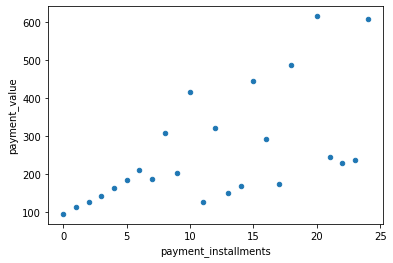

In [ ]:

addiction = order_payments.groupby("payment_installments").agg({"payment_value" : "mean"}).reset_index()

addiction.plot(x = "payment_installments", y = "payment_value", kind = "scatter")
print(addiction)
print("------------------------")
plt.show()


## Задание 10 (0.4 балла) ***Сдавать***

Визуализируйте зависимость между ценой заказа и ценой доставки по штатам покупки. Есть ли какая-нибудь зависимость и как вы можете ее обосновать?

***Складывается ощущение, что стоимость доаствки пропорциональна стоимости товара***

In [ ]:
orders10 = orders[["order_id", "customer_id"]]
order_items10 = order_items[["order_id", "price", "freight_value"]]
customers10 = customers[["customer_id", "customer_state"]]
df = pd.merge(orders10, order_items10)
df = pd.merge(df, customers10)
df = df.groupby("customer_state").agg({"price":"mean", "freight_value":"mean"})

<function matplotlib.pyplot.show(*args, **kw)>

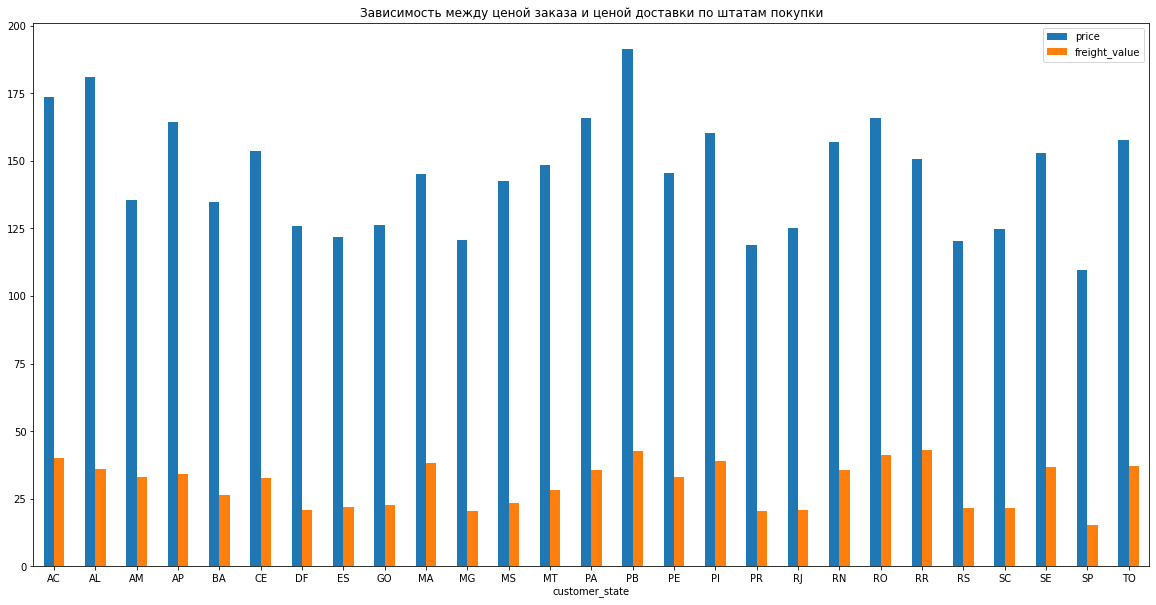

In [ ]:
ax = df.plot.bar(rot=0, figsize=(20, 10), title ="Зависимость между ценой заказа и ценой доставки по штатам покупки")
plt.show

## Задание 11 (0.4 балла) ***Сдавать***

Выведите график по числу покупок (в разбивке по статусам) и временем покупки (аггрегируйте покупки до дня)

In [ ]:
orders11 = orders
orders11["day"] = pd.to_datetime(orders11['order_purchase_timestamp']).dt.date


In [ ]:
data = orders11.groupby("order_status").agg({"order_id" : "count"}).reset_index()
data

,order_status,order_id
0,approved,2
1,canceled,625
2,created,5
3,delivered,96478
4,invoiced,314
5,processing,301
6,shipped,1107
7,unavailable,609


Text(0.5, 1.0, 'Число покупок по статусам')

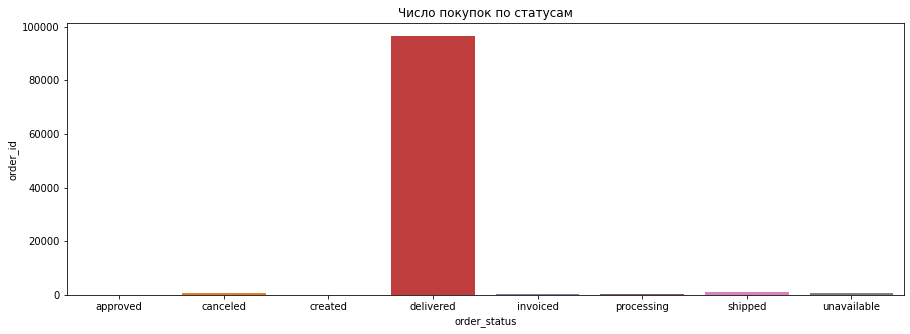

In [ ]:

plt.figure(figsize=(15, 5))

a = sns.barplot(data=data \
    , x="order_status", y="order_id")
a.set_title("Число покупок по статусам")

In [ ]:
data2 = orders11.groupby("day").agg({"order_id" : "count"}).reset_index()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data2.day, y=data2.order_id))

fig.update_layout(
    title = {
        "text": "Зависимость по дням и количеством заказов",
        "x": 0.5
    }
)

fig.update_layout(
    xaxis=dict(
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()

## Задание 12* (1 балл) ***Сдавать***

Используя полученные данные, а также сделав дополнительные вычисления (если необходимо), предположите:

1. Есть ли сезонность в покупках на маркетплейсе?
***На мой взгляд, сезонности не наблюдается***

2. Есть ли какие-то необъяснимые падение/рост продаж? С чем это может быть связано?
***Есть резкий скачок в ноябре 2017 года и подение в октябре 2018. Первое можно попробовать объяснить предверием какого нибудь бразильского праздника. Второе уменьшением покупальской способности населения по какой то причине***

## Задание 13 (0.3 балла) ***Сдавать***

Посчитайте CSAT (customer satisfaction - средняя оценка ревью) и отобразите средний CSAT по дням



In [ ]:
order_reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [ ]:
data=order_reviews.groupby("review_creation_date").agg({"review_score" : "mean"}).reset_index()
data = data.rename(columns={"review_creation_date": "Review_creation_date", "review_score" : "Review_score"})


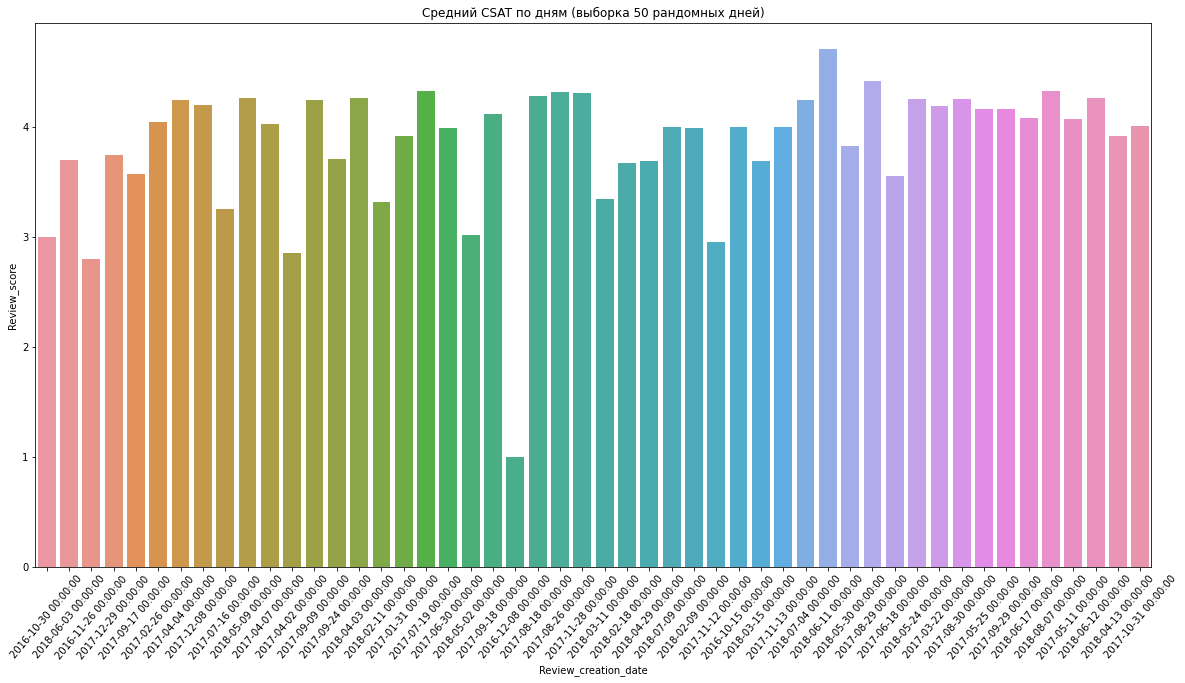

In [ ]:
# Покажу только для некоторых 

plt.figure(figsize=(20, 10))

b = sns.barplot(data= data.sample(50) \
    , x= "Review_creation_date", y="Review_score")

plt.xticks(rotation=50)

b.set_title("Cредний CSAT по дням (выборка 50 рандомных дней)")
plt.show()

## Задание 14 (0.3 балла) ***Сдавать***

Найдите топ-5 лучших и топ-5 худших продавцов по средней оценке и посчитайте их число продаж

In [ ]:
short_order_items = order_items [["order_id", "seller_id"]]
short_order_reviews = order_reviews[["order_id", "review_score"]]


merged_by_order_id = pd.merge(short_order_reviews, short_order_items, on="order_id")

merged_by_order_id = merged_by_order_id.drop_duplicates()




top_sellars = merged_by_order_id.groupby("seller_id").mean().sort_values(by="review_score").tail(5)
bad_sellars = merged_by_order_id.groupby("seller_id").mean().sort_values(by="review_score").head(5)

top_sellars = top_sellars.index.tolist()
bad_sellars = bad_sellars.index.tolist()



count_orders = merged_by_order_id.groupby(["seller_id"]).agg({"order_id": "nunique"})

count_orders_dict = count_orders.to_dict()

top_sellars_sails = []
for i in top_sellars:
  top_sellars_sails.append( count_orders_dict['order_id'][i])

bad_sellars_sails = []

for i in bad_sellars:
  bad_sellars_sails.append( count_orders_dict['order_id'][i] )



print(pd.DataFrame({"top_sellars_id":top_sellars, "sails":top_sellars_sails }))
print("------------------------------")
print(pd.DataFrame({"bad_sellars_id":bad_sellars, "sails":bad_sellars_sails }))


                     top_sellars_id  sails
0  45a3d05fb00435e52a28859dd03703b3      1
1  d7827b2af99326a03b0ed9c7a24db0d3      1
2  458d868c9642f55f18f04e951a3fdde6      2
3  0b1ca3ef18a63d7eb0c8897fa0849c08      1
4  9e94fa26a70ede4d26226e918e8706a2      1
------------------------------
                     bad_sellars_id  sails
0  9c57bc60cfad5ee62d35d3f1ce4593a1      1
1  8e670472e453ba34a379331513d6aab1      1
2  20fd2d2080ed85fa67fad3fcbb2c1813      1
3  dc120d932ddf9d4dfb6fd68beefda622      1
4  90d4125885ab6c86e8820a722be71974      3


## Задание 15 (0.3 балла). ***Сдавать***

Посмотрите, как быстро отвечают пользователи (сделайте аггреграцию по дням) и влияет ли это на оценку?

**Видим в левом верхнем углу скопление точек. Можно сделать предположение, что в срднем ответ даётся раньше, если оценка пользователя выше**

In [ ]:
parse_answer_time = order_reviews.review_answer_timestamp.apply(lambda x: parse(x))
answer_time_day = parse_answer_time.apply(lambda x: x.day)

parse_review_creation_date = order_reviews.review_creation_date.apply(lambda x: parse(x)) # делаем через apply
review_creation_day = parse_review_creation_date.apply(lambda x: x.day)

order_reviews["days_delta"] = (parse_answer_time - parse_review_creation_date).apply(lambda x: x.days)



In [ ]:
order_reviews.groupby("days_delta").agg({"review_score": "mean"}).reset_index()

days_delta = order_reviews.groupby("days_delta").agg({"review_score": "mean"}).reset_index().days_delta
review_score = order_reviews.groupby("days_delta").agg({"review_score": "mean"}).reset_index().reset_index().review_score


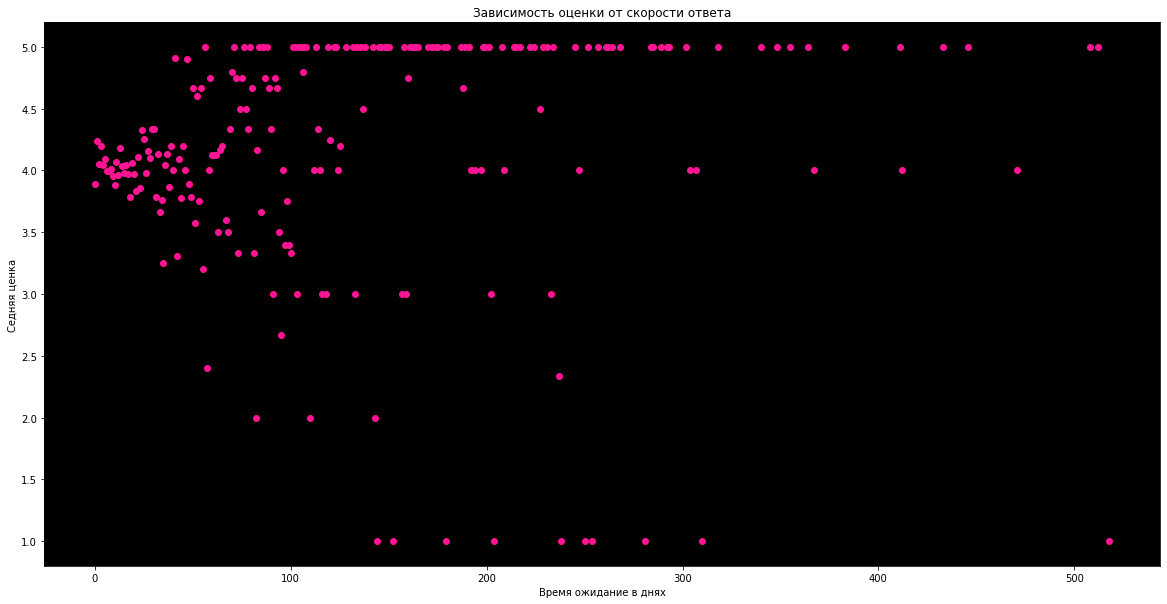

In [ ]:
x = days_delta   #  x - координаты точек
y = review_score    #  y - координаты точек

fig, ax = plt.subplots()

ax.scatter(x, y,
           c = 'deeppink')    #  цвет точек

ax.set_facecolor('black')     #  цвет области Axes


fig.set_figwidth(20)     #  ширина и
fig.set_figheight(10)    #  высота "Figure"

ax.set_xlabel('Время ожидание в днях')
ax.set_ylabel('Седняя ценка')
ax.set_title("Зависимость оценки от скорости ответа")
plt.show()

## Задание 16 (0.5 балла) ***Сдавать***

Отобразите распределение оценок для заказов, которые были доставлены вовремя и которые пришли с опозданием. Насколько влияет факт опоздания на оценку?

***Видно, что оценка выше, если заказ пришел вовремя***

In [ ]:
df = pd.merge(order_reviews, orders, on="order_id")

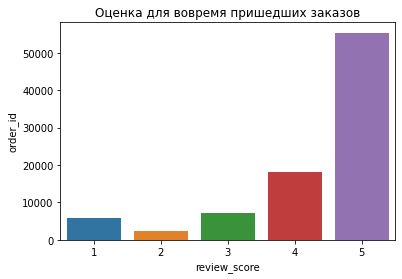

In [ ]:
# График для вовремя пришедших заказов

in_time = df[df.order_delivered_customer_date <= df.order_estimated_delivery_date]
rev_score_in_time = in_time.groupby("review_score").agg({"order_id":"count"})
b = sns.barplot(data=rev_score_in_time.reset_index(), x="review_score", y="order_id")

b.set_title("Оценка для вовремя пришедших заказов")
plt.show()

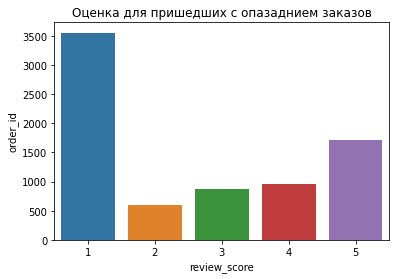

In [ ]:
# График для опаздавших заказов

lose_time = df[df.order_delivered_customer_date > df.order_estimated_delivery_date]
rev_score_lose_time = lose_time.groupby("review_score").agg({"order_id":"count"})
b = sns.barplot(data=rev_score_lose_time.reset_index(), x="review_score", y="order_id")
b.set_title("Оценка для пришедших c опазаднием заказов")
plt.show()

## Задание 17* (1,5 балла)

Есть ли среди пользователей хейтеры? Определите их и вычислите средний CSAT без их участия

## Задание 18 (0.4 балла)

Изобразите зависимость между ценой заказа и числом дней между покупкой и доставкой с разбивкой по признаку "есть заказ из другого штата". Есть ли зависимость?

***Кажется, что зависимости нет***

In [ ]:
order_seller = order_seller.merge(sellers)
order_seller = order_seller[["order_id", "seller_id", "seller_state"]]
orders = orders.merge(order_seller)

In [ ]:
order_and_price = orders.merge(order_pay).merge(customers)
order_and_price = order_and_price.groupby(["order_id", "customer_id", "seller_id", "seller_state", "customer_state", "order_purchase_timestamp", "order_delivered_customer_date"]).agg({"payment_value":"sum"}).reset_index()
order_and_price[["order_delivered_customer_date", "order_purchase_timestamp"]] = order_and_price[["order_delivered_customer_date", "order_purchase_timestamp"]].apply(pd.to_datetime)
order_and_price = order_and_price[["order_id", "customer_id", "order_purchase_timestamp", "order_delivered_customer_date", "payment_value", "customer_state", "seller_state"]]
order_and_price["diff_days"] = (order_and_price["order_delivered_customer_date"] - order_and_price["order_purchase_timestamp"]).dt.days
order_and_price["is_same_states"] = (order_and_price["seller_state"] == order_and_price["customer_state"])



In [ ]:
order_and_price.drop_duplicates("order_id", inplace=True)
order_and_price["payment_value"] = order_and_price["payment_value"].apply(lambda x:round(x))
order_and_price

,order_id,customer_id,order_purchase_timestamp,order_delivered_customer_date,payment_value,customer_state,seller_state,diff_days,is_same_states
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,2017-09-13 08:59:02,2017-09-20 23:43:48,72,RJ,SP,7,False
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26 10:53:06,2017-05-12 16:04:24,260,SP,SP,16,True
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14 14:33:31,2018-01-22 13:19:16,217,MG,MG,7,True
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,2018-08-08 10:00:35,2018-08-14 13:32:39,26,SP,SP,6,True
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,2017-02-04 13:57:51,2017-03-01 16:42:31,218,SP,PR,25,False
...,...,...,...,...,...,...,...,...,...
97811,fffc94f6ce00a00581880bf54a75a037,b51593916b4b8e0d6f66f2ae24f2673d,2018-04-23 13:57:06,2018-05-10 22:56:40,343,MA,SC,17,False
97812,fffcd46ef2263f404302a634eb57f7eb,84c5d4fbaf120aae381fad077416eaa0,2018-07-14 10:26:46,2018-07-23 20:31:55,387,PR,SP,9,False
97813,fffce4705a9662cd70adb13d4a31832d,29309aa813182aaddc9b259e31b870e6,2017-10-23 17:07:56,2017-10-28 12:22:22,117,SP,PR,4,False
97814,fffe18544ffabc95dfada21779c9644f,b5e6afd5a41800fdf401e0272ca74655,2017-08-14 23:02:59,2017-08-16 21:59:40,65,SP,SP,1,True


In [ ]:
df_same_true = order_and_price[order_and_price.is_same_states == False]
df = df_same_true.groupby("diff_days").agg({"payment_value":"mean"}).reset_index()

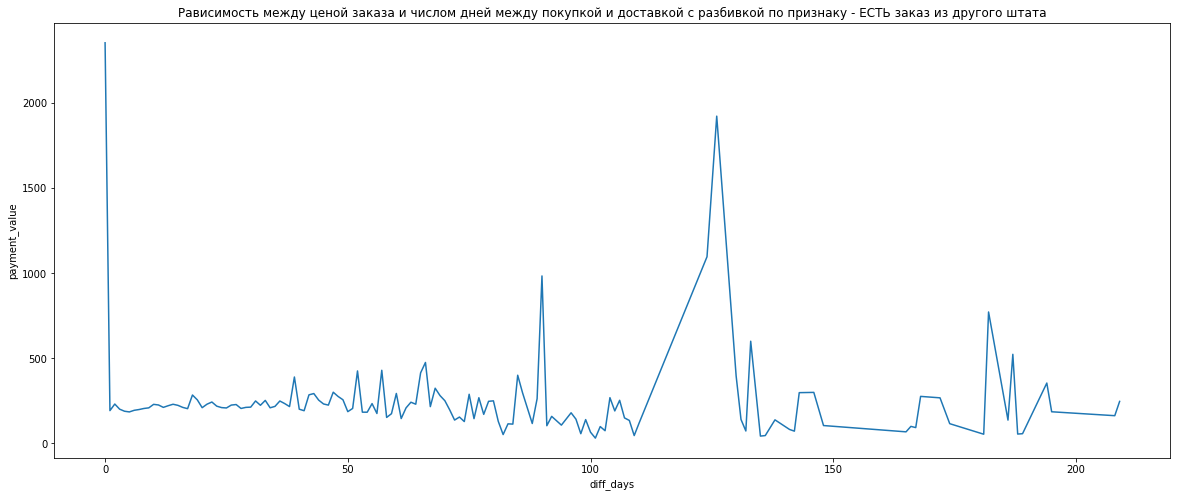

In [ ]:
plt.figure(figsize=(20, 8))

b1 = sns.lineplot(data=df \
    , x="diff_days", y="payment_value")

b1.set_title("Pависимость между ценой заказа и числом дней между покупкой и доставкой с разбивкой по признаку - ЕСТЬ заказ из другого штата")
plt.show()

In [ ]:
df_same_true = order_and_price[order_and_price.is_same_states == True]
df = df_same_true.groupby("diff_days").agg({"payment_value":"mean"}).reset_index()

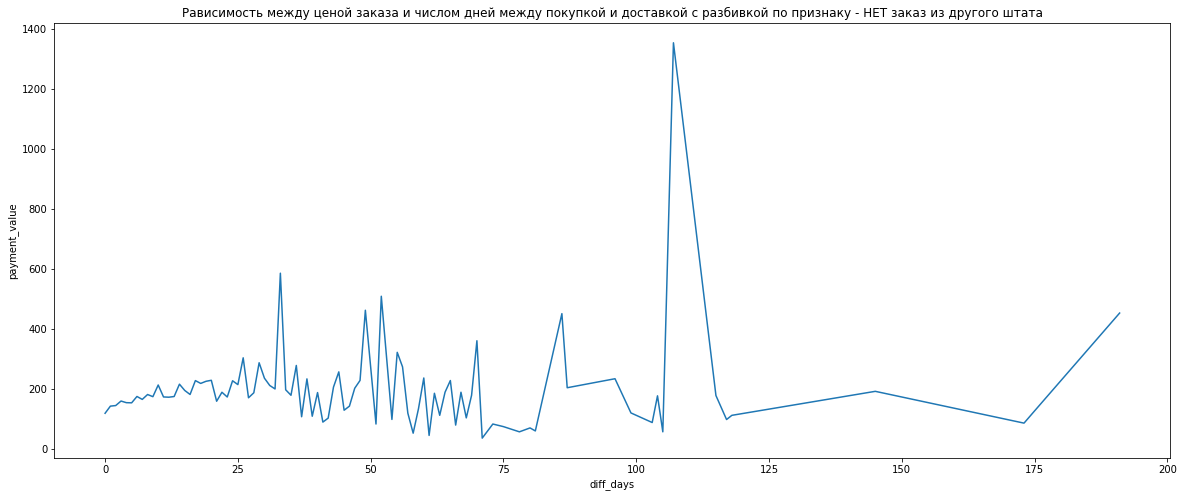

In [ ]:
plt.figure(figsize=(20, 8))

b2 = sns.lineplot(data=df \
    , x="diff_days", y="payment_value")

b2.set_title("Pависимость между ценой заказа и числом дней между покупкой и доставкой с разбивкой по признаку - НЕТ заказ из другого штата")
plt.show()

## Задание 19 (0.6 баллов) ***Сдавать***

Отобразите на карте все точки продавцов (если они находятся в одном месте, то необходимо отметить кол-во)

Где больше всего продавцов находится?

**По карте видно, что большинство продавцов находится на юго-востоке Бразилии**

In [ ]:
geolocation_droped = geolocation.drop_duplicates("geolocation_zip_code_prefix")

geo_info = pd.merge(sellers, geolocation_droped, how="inner", left_on="seller_zip_code_prefix", right_on="geolocation_zip_code_prefix")

geo_info['count_codes'] = geo_info.geolocation_zip_code_prefix.apply(lambda zip_code: len(geo_info[geo_info.geolocation_zip_code_prefix == zip_code])) 

fig = go.Figure(go.Scattermapbox(lat=geo_info['geolocation_lat'], 
                                 lon=geo_info['geolocation_lng'], 
                                 hoverinfo="text", hovertext=geo_info.count_codes))

capital = geo_info[geo_info['geolocation_city']=='campinas']

map_center = go.layout.mapbox.Center(lat=capital['geolocation_lat'].values[0], lon=capital['geolocation_lng'].values[0])

fig.update_layout(mapbox_style="open-street-map", mapbox=dict(center=map_center, zoom=3))




## Задание 20 (1,5 балл) ***Сдавать***

Определите топ-5 продавцов, которые чаще всего отсылают свою посылку в другие регионы и визуализируйте их отсылки

In [ ]:
seller_order = order_items[["seller_id", "order_id"]]
seller_id_state = sellers[["seller_id", "seller_state"]]

seller_order_state = pd.merge(seller_order, seller_id_state, on="seller_id")


order_id_cust_id = orders[["customer_id", "order_id"]] 
cust_id_state = customers[["customer_id", "customer_state"]]

cust_order_state = pd.merge(order_id_cust_id, cust_id_state, on="customer_id")

df = pd.merge(seller_order_state, cust_order_state, on="order_id")


In [ ]:
sail_in_area = df[df.seller_state == df.customer_state]
sail_another_state = df[df.seller_state != df.customer_state]

top_5 = sail_another_state.groupby("seller_id").agg({"order_id":"count"}).reset_index().sort_values("order_id", ascending=False).head(5)


In [ ]:
df_seller1 = df[df.seller_id == top_5.seller_id.tolist()[0]]
states_seller_1 = df_seller1.groupby("customer_state").agg({"order_id":"count"}).reset_index()


df_seller2 = df[df.seller_id == top_5.seller_id.tolist()[1]]
states_seller_2 = df_seller2.groupby("customer_state").agg({"order_id":"count"}).reset_index()


df_seller3 = df[df.seller_id == top_5.seller_id.tolist()[2]]
states_seller_3 = df_seller3.groupby("customer_state").agg({"order_id":"count"}).reset_index()


df_seller4 = df[df.seller_id == top_5.seller_id.tolist()[3]]
states_seller_4 = df_seller4.groupby("customer_state").agg({"order_id":"count"}).reset_index()


df_seller5 = df[df.seller_id == top_5.seller_id.tolist()[4]]
states_seller_5 = df_seller5.groupby("customer_state").agg({"order_id":"count"}).reset_index()


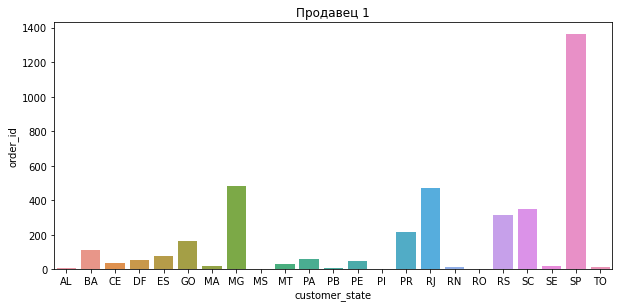

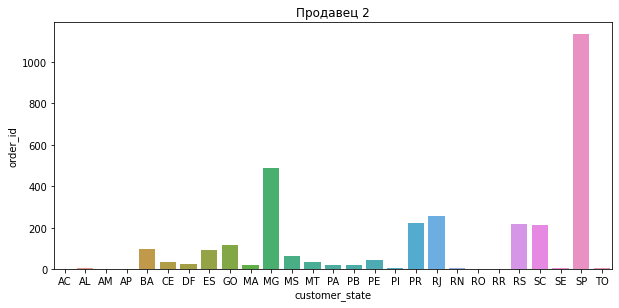

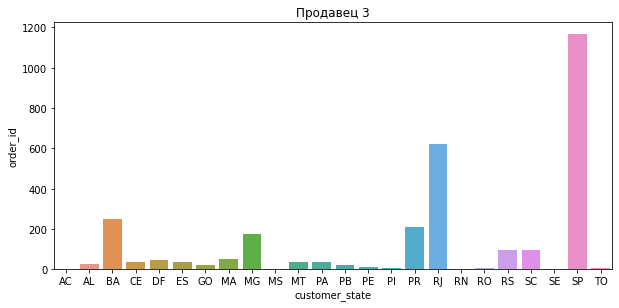

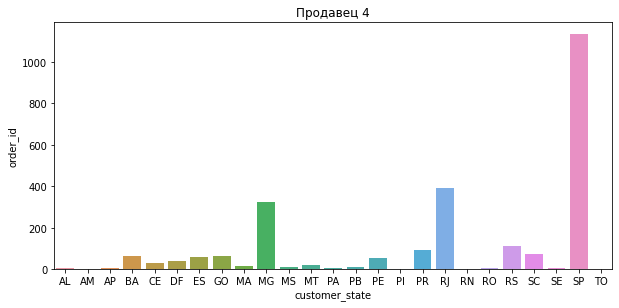

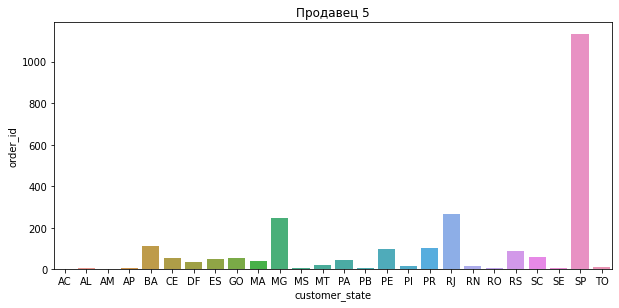

In [ ]:
fig = plt.figure(figsize =(10, 10))
plt.subplot(2, 1, 1)
sns.barplot(data=states_seller_1 \
    , x="customer_state", y="order_id")

plt.title ("Продавец 1")
plt.show()


fig = plt.figure(figsize =(10, 10))
plt.subplot(2, 1, 1)
sns.barplot(data=states_seller_2 \
    , x="customer_state", y="order_id")

plt.title ("Продавец 2")
plt.show()


fig = plt.figure(figsize =(10, 10))
plt.subplot(2, 1, 1)
sns.barplot(data=states_seller_3 \
    , x="customer_state", y="order_id")

plt.title ("Продавец 3")
plt.show()


fig = plt.figure(figsize =(10, 10))
plt.subplot(2, 1, 1)
sns.barplot(data=states_seller_4 \
    , x="customer_state", y="order_id")

plt.title ("Продавец 4")
plt.show()


fig = plt.figure(figsize =(10, 10))
plt.subplot(2, 1, 1)
sns.barplot(data=states_seller_5 \
    , x="customer_state", y="order_id")

plt.title ("Продавец 5")
plt.show()

## Задание 21* (2 балла)

Сделайте анимацию по датам с доставкой между продавцами и пользователями

## Задание 22* (творческое, отдельно поставим баллы)

Проведите дополнительно исследование между параметрами, которые вам интересны и могут быть полезными (обоснуйте, зачем это смотреть). Сделайте выводы

## Попугай для ДЗ

![](https://upload.wikimedia.org/wikipedia/commons/thumb/c/ca/Rose-ringed_parakeet_%28Psittacula_krameri_manillensis%29.jpg/1024px-Rose-ringed_parakeet_%28Psittacula_krameri_manillensis%29.jpg)

А это ожереловый попугай (или индийский кольчатый попугай). Этот вид явно выделяет наличие такого колечка на шее. Самый распространенный попугай в мире

Они очень хорошо и быстро летают, но ходят максимально неуклюже)

В отличии от многих попугаев, для которых человеческая деятельность является вредом и уменьшает их естественный ареал обитания, то как раз для этих птиц человеческая деятельность - это плюс, потому что они находят корм внутри человеческих обществ (не боятся людей, лучше всего приспосабливаются, едят пшеницу). Поговаривают, что в качестве домашних попугаев их держали еще в древней Греции и Риме, а в  средневековой Индии ожереловые попугаи часто были питомцами знатных особ и монархов, причём владение этим попугаем считалось элементом роскоши и престижа